In [12]:
import os
import csv
import pandas as pd
import numpy as np

import re
import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import squarify
import networkx as nx

from sklearn import model_selection, preprocessing, metrics
plt.style.use('fivethirtyeight')

print(os.getcwd())
print(os.listdir("../"))

/Users/vishakhadudani/APR1
['Untitled Folder', '.Directory-1534269790', 'APR1', 'Music', '.condarc', 'Untitled1.ipynb', '.DS_Store', 'nltk_data', 'arxiv.json', 'settings.cfg', '.CFUserTextEncoding', 'mag_2015_processed.csv', 'midterm-2-takehome.pdf', 'arxiv.csv', 'Untitled.ipynb', "NLP-Paper - CNN'.pdf", '.local', 'Creative Cloud Files', 'Pictures', 'sampleTensorFlow', 'Test_tensor.ipynb', 'processed_data.csv', '2008.json', '.ipython', 'Desktop', 'Library', '.matplotlib', 'test.py', '.oracle_jre_usage', 'MS SBU', 'Online Return Center.pdf', 'Test-Notebook.ipynb', 'MAG_processed-20181207T192808Z-002.zip', '.bash_sessions', 'Word_cloud_nlp.png', 'untitled.txt', '.bash_profile-anaconda2.bak', 'Public', 'NLP2014Paper.pdf', 'examples', 'vector_plit.png', '.anaconda', 'BF00367750.pdf', 'APR', 'Movies', 'Applications', 'result.csv', '.Trash', '.ipynb_checkpoints', '.jupyter', '.keras', 'helloworld.py', 'Documents', 'venv', 'nyc-taxi-fare-prediction.ipynb', 'mag_2018.csv', '.bash_profile', 'da

In [13]:
df = pd.read_csv('../processed_data.csv')

In [14]:
df.shape

(1435910, 21)

In [69]:
len(D2)

15

In [84]:
import itertools
D2=dict(itertools.islice(adj_list.items(),5))
D2

{2014935324.0: [1760544772,
  2121772044,
  2060724751,
  1508186648,
  2102415385,
  2017713688,
  263553050,
  2079854619,
  2035743770,
  2103480351,
  2092831789,
  2113467957,
  2084630589,
  2037915714,
  2148903494,
  2072542791,
  2140720209,
  1984447059,
  2058122340,
  2096285801,
  2054921835,
  1992935537,
  2125284466,
  2012304502,
  2476433526,
  2088599176,
  2050949257,
  2022581387,
  2072923279,
  2153101972,
  2047986838,
  2072020654,
  2101977779,
  2139754676,
  2137405619,
  2087687862,
  1491016379,
  2008138427,
  2070716620,
  2114171596,
  2087980253,
  1980512989,
  2026237155,
  2094679283,
  2028260084,
  2033121022,
  1977838850,
  2057008393,
  1970565395,
  1983977749,
  2052976411,
  1991855909,
  2037012265,
  2088498991,
  2088485687,
  1998521147,
  2074757955,
  2010724164,
  1986583880,
  2143841618,
  2030126423,
  2118492507,
  2032490333,
  1988829538,
  2080870246,
  2018317672,
  2092377962,
  2148226925,
  1997613934,
  2058323824,
  20119

In [88]:
adj_list = {}
for key,row in df.iterrows():
    curr_list = adj_list.get(row[0], [])
    curr_list.extend(map(int,re.findall(r'\d+', df["References"][0])))
    curr_list = list(set(curr_list))
    adj_list[row[0]] = curr_list
adj_list

KeyboardInterrupt: 

In [32]:
outlink_map = {}
inlink_map = {}
numrows = 0
df_new = df[df["References"].notnull()]
for index, row in df_new.iterrows():
    if numrows<100:
        numrows+=1
        ref = row["References"]
        ref_list = list(map(int,ref.strip("[]'").split(",")))
        for ref in ref_list:
            listi = inlink_map.get(ref, [])
            listi.append(row["Id"])
            inlink_map[ref] = listi

KeyboardInterrupt: 

In [51]:
rev_adj_list = {}
for key, nodes in D2.items():
    for n in nodes:
        curr_list = rev_adj_list.get(n, [])
        curr_list.append(key)
        curr_list = list(set(curr_list))
        rev_adj_list[n] = curr_list

In [52]:
len(rev_adj_list)

92

In [25]:
def get_reach(id):
    nodes_list = rev_adj_list[id]
    temp_list = []
    result_list = []
    for i in range(3):
        for n in nodes_list:
            if n in rev_adj_list:
                temp_list.extend(rev_adj_list[n])
            result_list.append(n)
        nodes_list = list(set(temp_list) - set(result_list)-set([id]))
    return len(result_list)

In [31]:
get_reach(2148226925)

100

In [147]:
node_sizes = []
_labels = {}
for i in range(2,250):
    _labels[i] = i
    node_sizes.append( 4 * i )

import networkx as nx
G = nx.Graph()
count =0
for key, nodes in D2.items():
    
    for i,n in enumerate(nodes):
        if count < 250:
            count+=1
            if n not in G:
                G.add_node(n)
            if key not in G:
                G.add_node(key)
            if not G.has_edge(key,n) or not G.has_edge(key,n):
                G.add_edge(key, n)

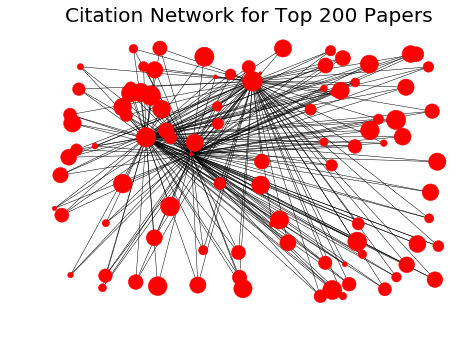

In [194]:
# pos = nx.random_layout(G,dim=2)

nx.draw_random(G, with_labels=False, node_size = node_sizes, width =  0.5)
# nx.draw(G, with_labels=True, labels=_labels)
plt.title('Citation Network for Top 200 Papers')
plt.draw()
plt.show()


In [160]:
list(nx.connected_components(G))

[{263553050,
  1491016379,
  1508186648,
  1598581722,
  1633731518,
  1760544772,
  1965319603,
  1970565395,
  1977838850,
  1980512989,
  1983208835,
  1983421851,
  1983977749,
  1984447059,
  1986583880,
  1988829538,
  1991855909,
  1992935537,
  1997613934,
  1998521147,
  2008138427,
  2010724164,
  2011918196,
  2012304502,
  2014935324.0,
  2017713688,
  2018317672,
  2022235068,
  2022581387,
  2022877146,
  2026237155,
  2028260084,
  2030126423,
  2031165376,
  2032276957,
  2032490333,
  2033121022,
  2035743770,
  2037012265,
  2037915714,
  2047986838,
  2050949257,
  2052976411,
  2054921835,
  2057008393,
  2058122340,
  2058323824,
  2060724751,
  2068824512,
  2070716620,
  2072020654,
  2072542791,
  2072923279,
  2074757955,
  2076037500,
  2079854619,
  2080870246,
  2081362853,
  2084630589,
  2087687862,
  2087980253,
  2088485687,
  2088498991,
  2088599176,
  2092377962,
  2092831789,
  2094679283,
  2096285801,
  2101893110,
  2101977779,
  2102415385,
  210

In [165]:
df.head()


,Unnamed: 0,Authors,Conference,Citation_count,Date,Expected_count,Domain,Id,Journal,References,...,Venue,Words,Year,Popularity,Month,Publication_Rank,Publication Type,Number_Of_authors,Domain_count,Field
0,0,"[{'AuId': 2077177608, 'S': 1, 'AuN': 'a k geim...",NaN,32455,2007-03-01,32455.0,"[{'FId': 2776443344, 'FN': 'graphene antenna'}...",2.014935e+09,"{'JN': 'nat mater', 'JId': 103895331}","[2058122340, 2125284466, 2101977779, 213633433...",...,Nature Materials,"['graphene', 'rise']",2007.0,-13.939,3,18.263,1,2,10,materials science
1,1,"[{'S': 1, 'AuId': 2164450181, 'AfN': 'arizona ...",NaN,31972,2007-04-18,31972.0,"[{'FId': 2779695215, 'FN': 'methanococcoides'}...",2.125121e+09,"{'JN': 'mol biol evol', 'JId': 57552105}","[2106882534, 2146396346, 2097706568, 212167786...",...,Molecular Biology and Evolution,"['0', '4', 'evolutionary', 'genetics', 'mega',...",2007.0,-13.987,4,5.475,1,5,10,biology
2,2,"[{'AuId': 2021634522, 'S': 1, 'AuN': 'jorgen v...",NaN,11931,2007-09-15,11931.0,"[{'FId': 2778067265, 'FN': 'fluticasone furoat...",2.127951e+09,"{'JN': 'amer j respir crit care med', 'JId': 9...","[2037377025, 2125078269, 2054931962, 158332766...",...,American Journal of Respiratory and Critical C...,"['chronic', 'diagnosis', 'disease', 'executive...",2007.0,-14.603,9,5.942,1,13,10,medicine
3,3,"[{'S': 1, 'AuId': 2076027038, 'AfN': 'massachu...",NaN,15997,2007-09-01,15997.0,"[{'FId': 194139352, 'FN': 'imputation'}, {'FId...",2.161634e+09,"{'JN': 'amer j hum genet', 'JId': 134425043}","[2110065044, 2076983043, 2162530578, 209812659...",...,American Journal of Human Genetics,"['analyses', 'association', 'genome', 'linkage...",2007.0,-14.608,9,7.450,1,18,11,biology
4,4,"[{'S': 1, 'AuId': 2559180283, 'AfN': 'european...",NaN,22014,2007-11-01,22014.0,"[{'FId': 169485995, 'FN': 'file transfer proto...",2.137016e+09,"{'JN': 'bioinformatics', 'JId': 52395412}","[2106882534, 2097382368, 2132926880, 212777499...",...,Bioinformatics,"['0', '2', 'clustal', 'version', 'w', 'x']",2007.0,-14.663,11,6.140,1,13,10,computer science


In [201]:
df['Reach'] = df['Citation_count']/2

In [203]:
df['Reach'] = df['Reach'].astype(int)

In [205]:
df['Reach'].describe()

count    1.435910e+06
mean     2.793077e+01
std      8.817629e+01
min      0.000000e+00
25%      2.000000e+00
50%      9.000000e+00
75%      3.400000e+01
max      2.414500e+04
Name: Reach, dtype: float64

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text xticklabel objects>)

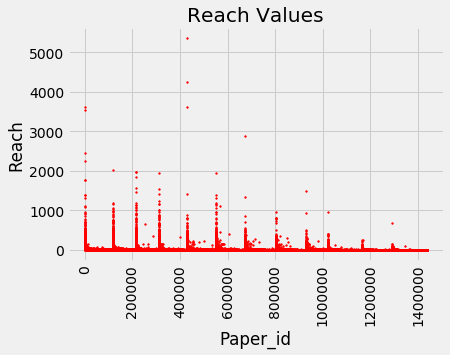

In [199]:
plt.scatter(x=df['Unnamed: 0'], y=df['Reach'],s=3, color = 'red')
plt.xlabel("Paper_id")
plt.ylabel("Reach")
plt.title('Reach Values')
plt.xticks(rotation='vertical')

In [200]:
plt.show()

In [188]:
_df = df['Reach'].head(100)

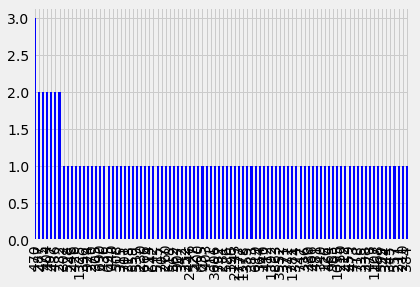

In [189]:
_df.value_counts().plot.bar(color = 'blue');

In [207]:
_dict = {}
for rows in df:
   _dict[int(rows['Id'])] = rows['Reach'] 

TypeError: string indices must be integers

In [208]:
df_C = pd.DataFrame(df['Id'], df['Reach'])

In [209]:
df_C

,Id
Reach,
16227,2.137735e+09
15986,1.969892e+09
5965,2.147256e+09
7998,2.132437e+09
11007,2.097018e+09
8018,2.017789e+09
10096,2.026164e+09
3566,2.160662e+09
6265,1.988876e+09


In [211]:
df_C.to_csv("Reach.csv")

In [212]:
df0 = pd.read_csv("../Model_output_rank.csv")

In [213]:
df0

,Unnamed: 0,Authors,Conference,Citation_count,Date,Expected_count,Domain,Id,Journal,References,...,Topic,Year Since Publication,Venue_label,Topic_label,page_rank,Avg_Author_score,FirstAuthor,FirstAuthorScore,Domain_count,prob
0,0,"[{'AuId': 2168721218, 'S': 1, 'AuN': 'emelia j...",NaN,2159,2017-03-07,2159.0,"[{'FId': 2780074459, 'FN': 'heart disease'}, {...",2580792129,"{'JN': 'circulation', 'JId': 116251202}","[2520432709, 2125065061, 1593442063, 201907130...",...,medicine,1.0,1341881,1435906,1.0,0.246322,2168721218,0.272091,5,0.731059
1,92831,"[{'S': 1, 'AuId': 2506183536, 'AfN': 'universi...",NaN,60,2014-04-01,60.0,"[{'FId': 132455925, 'FN': 'cas9'}, {'FId': 319...",2094412995,"{'JN': 'planta', 'JId': 193523036}","[2064815984, 2003171404, 2045435533, 217003974...",...,biology,4.0,1435850,1435909,1.0,0.801121,2506183536,0.785940,11,0.731059
2,92833,"[{'AuId': 2792296353, 'S': 1, 'AuN': 'manas da...",NaN,18,2014-06-20,18.0,"[{'FId': 2780437523, 'FN': 'propargyl'}, {'FId...",2331348391,"{'JN': 'j org chem', 'JId': 205050996}","[2146070037, 1991735920, 2096945699, 199478735...",...,chemistry,4.0,1393575,1435908,1.0,0.757706,2792296353,0.784880,11,0.731059
3,92834,"[{'S': 1, 'AuId': 2149078358, 'AfN': 'universi...",NaN,22,2014-07-01,22.0,"[{'FId': 2778461419, 'FN': 'nicrophorus vespil...",2139392205,"{'JN': 'ecol lett', 'JId': 80967739}","[260994251, 2115493532, 1490421035, 2171153116...",...,biology,4.0,1435032,1435909,1.0,0.721470,2149078358,0.602524,9,0.731059
4,92835,"[{'AuId': 2491247798, 'S': 1, 'AuN': 'deborah ...",NaN,12,2014-08-01,12.0,"[{'FId': 2776915481, 'FN': 'entrapment'}, {'FI...",2111622457,"{'JN': 'curr anthropol', 'JId': 165709033}","[1527165181, 2068602705, 1520894393, 207443982...",...,economics,4.0,1410855,1435855,1.0,0.846734,2491247798,0.846734,9,0.731059
5,92836,"[{'AuId': 1635337697, 'S': 1, 'AuN': 'martin s...",NaN,17,2014-08-01,17.0,"[{'FId': 164027704, 'FN': 'proinflammatory cyt...",2010242129,"{'JN': 'eur resp j', 'JId': 198733495}","[1533021978, 1934712179, 2103225674, 200830837...",...,biology,4.0,1434992,1435909,1.0,0.563880,1635337697,0.605294,12,0.731059
6,92838,"[{'S': 1, 'AuId': 2480479914, 'AfN': 'hanyang ...",NaN,29,2014-09-11,29.0,"[{'FId': 514689293, 'FN': 'american political ...",2123424132,"{'JN': 'organ sci', 'JId': 206124708}","[1523201922, 2106096361, 2797247465, 215029161...",...,business,4.0,1421700,1435819,1.0,0.741420,2480479914,0.823717,9,0.731059
7,92839,"[{'AuId': 1992052200, 'S': 1, 'AuN': 'christop...",NaN,15,2014-10-03,15.0,"[{'FId': 2776254738, 'FN': 'alkene'}, {'FId': ...",2321022023,"{'JN': 'org lett', 'JId': 201989124}","[2143981217, 2150697053, 2023271753, 201121542...",...,chemistry,4.0,1435829,1435908,1.0,0.721699,1992052200,0.862392,9,0.731059
8,92842,"[{'AuId': 2099110382, 'S': 1, 'AuN': 'daniel t...",NaN,23,2014-12-01,23.0,"[{'FId': 71558431, 'FN': 'okta'}, {'FId': 7511...",2124571714,"{'JN': 'j climate', 'JId': 80591372}","[2024060531, 2083339292, 1613795631, 215944306...",...,geology,4.0,1434456,1435721,1.0,0.557408,2099110382,0.526116,10,0.731059
9,92843,"[{'AuId': 2590514135, 'S': 1, 'AuN': 'xiaoli z...",NaN,21,2014-07-31,21.0,"[{'FId': 31500677, 'FN': 'field effect'}, {'FI...",2038894287,"{'JN': 'sensors', 'JId': 101949793}","[1980516378, 1997197841, 2161552938, 211404805...",...,engineering,4.0,1435780,1435843,1.0,0.530618,2590514135,0.637385,10,0.731059
